# {Project Title}📝
Women in Leadership position in Tech jobs
![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
 Why is distribution of women in workforce in Tech Jobs lower?



## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Is College education required to work in tech? How helpful is going to college?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The behavior trait in women could make them less interested in Tech. Also, due to the sector being male dominated females aren't motivated to try.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
kaggle 
stack overflow survey data 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [18]:
# Start your code here
import pandas as pd
import numpy as np
import opendatasets as od
import requests
from bs4 import BeautifulSoup
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv(r'C:\stack-overflow-developer-survey-2022\survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [35]:
cols_to_keep = ['ResponseId', 'Employment', 'EdLevel', 'DevType', 'Country','YearsCode','ConvertedCompYearly']
new_df = df.loc[:, cols_to_keep]
new_df.head()

,ResponseId,Employment,EdLevel,DevType,Country,YearsCode,ConvertedCompYearly
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Employed, full-time",NaN,NaN,Canada,NaN,NaN
2,3,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,14,40205.0
3,4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Israel,20,215232.0
4,5,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, full-stack;Dev...",United States of America,8,NaN


In [45]:
tech_salaries_df = pd.read_csv(r'C:\Users\diksh\Downloads\salaries_clean.csv')
tech_salaries_df.head()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [48]:
new_columns = ['index', 'employer_name', 'location_name', 'job_title', 'job_title_category', 'total_experience_years', 'annual_base_pay']
salaries_df = tech_salaries_df.loc[:, new_columns]
salaries_df.head()

,index,employer_name,location_name,job_title,job_title_category,total_experience_years,annual_base_pay
0,0,opower,"san francisco, ca",systems engineer,Engineering,13.0,125000.0
1,1,walmart,"bentonville, ar",senior developer,Software,15.0,65000.0
2,2,vertical knowledge,"cleveland, oh",software engineer,Software,4.0,86000.0
3,3,netapp,waltham,mts,Other,4.0,105000.0
4,4,apple,cupertino,software engineer,Software,4.0,110000.0


In [49]:
salaries_df.isna().sum()

index                      0
employer_name              4
location_name              0
job_title                  0
job_title_category         0
total_experience_years    47
annual_base_pay            4
dtype: int64

In [50]:
salaries_df.dropna(
    subset=['employer_name','total_experience_years','annual_base_pay'],
    inplace=True
)

In [51]:
salaries_df.isnull().sum()

index                     0
employer_name             0
location_name             0
job_title                 0
job_title_category        0
total_experience_years    0
annual_base_pay           0
dtype: int64

In [52]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 0 to 1654
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1603 non-null   int64  
 1   employer_name           1603 non-null   object 
 2   location_name           1603 non-null   object 
 3   job_title               1603 non-null   object 
 4   job_title_category      1603 non-null   object 
 5   total_experience_years  1603 non-null   float64
 6   annual_base_pay         1603 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 100.2+ KB


In [53]:
salaries_df.describe()

,index,total_experience_years,annual_base_pay
count,1603.000000,1603.000000,1.603000e+03
mean,827.102308,6.753481,6.505970e+06
std,478.380100,5.687385,2.497931e+08
min,0.000000,0.000000,0.000000e+00
25%,413.500000,3.000000,6.100000e+04
50%,825.000000,5.000000,9.948000e+04
75%,1242.500000,10.000000,1.300000e+05
max,1654.000000,56.000000,1.000000e+10


In [59]:
salaries_data_df = pd.read_csv(r'C:\Users\diksh\Downloads\Salary_Data.csv')
salaries_data_df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


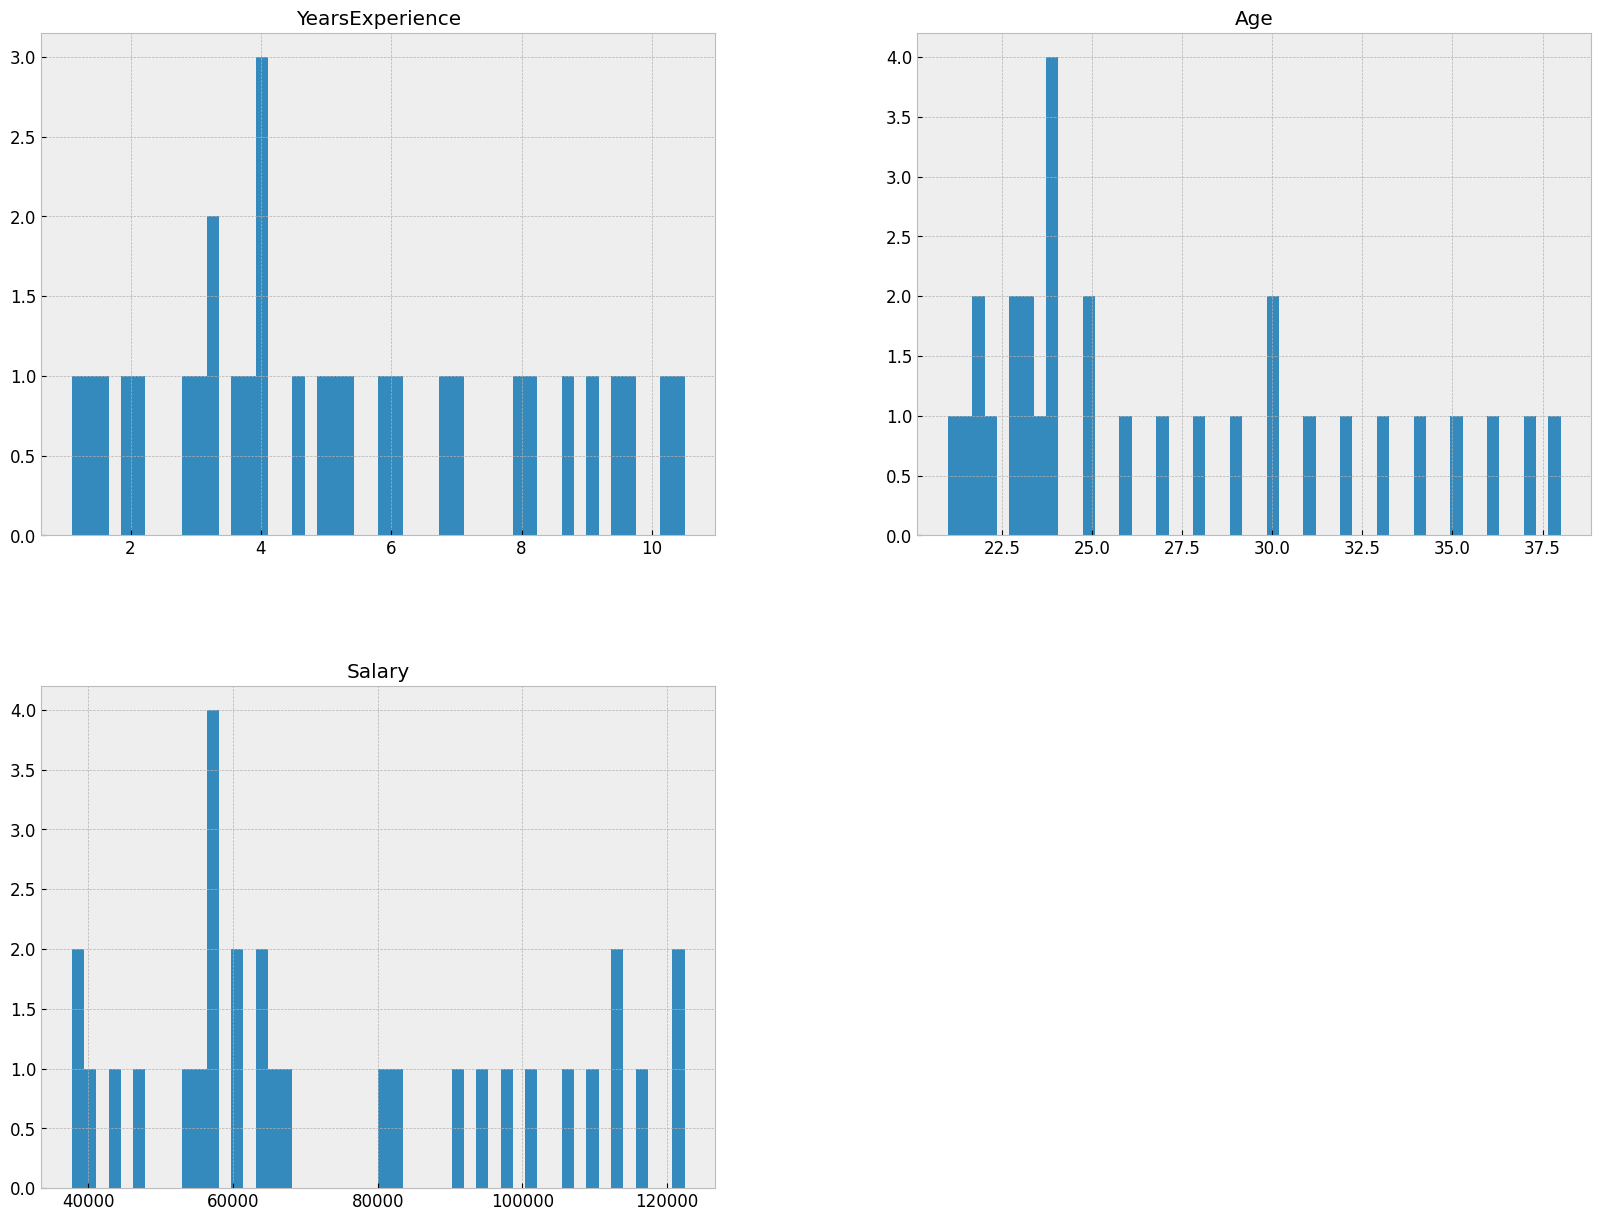

In [60]:
salaries_data_df.hist(bins=50, figsize=(20,15))
plt.show()

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
